In [1]:
from fastai.tabular import *

In [2]:
path = 'C:/Users/Jorge Mejia/Desktop/analisis_de_las_variables_de_la_esquizotipia_con_deep_learning/analisis_con_dataset_original/'
path

'C:/Users/Jorge Mejia/Desktop/analisis_de_las_variables_de_la_esquizotipia_con_deep_learning/analisis_con_dataset_original/'

In [3]:
df = pd.read_csv(path + 'dataset_esquizotipia_original.csv')
df.head()

,ESTRES_PERCIBIDO,CSI_RESPROBL,CSI_REESTCOGN,CSI_APOYOSOC,CSI_EXPEMOC,CSI_EVITPROBL,CSI_PENSDESID,CSI_RETISOC,CSI_AUTOCRIT,ANSIEDADRASGO,...,SCL90_PSICOT,CAPE_POSIT_FREC,CAPE_POS_MALESTAR,CAPE_NEG_FREC,CAPE_NEG_MALESTAR,CAPE_DEPRE_FREC,CAPE_DEPRE_MALESTAR,TRAUMA_FRECUENCIA,TRAUMA_AFECTACION,SPQ_TOTAL_ESQUIZOT
0,23,17,5,0,0,7,5,13,2,20,...,0,24,4,14,0,8,0,4,8,0
1,22,13,11,3,10,6,11,17,11,17,...,9,22,2,29,33,11,3,9,29,0
2,10,20,20,20,16,11,8,3,0,20,...,5,30,9,29,21,10,2,12,25,1
3,7,12,1,0,7,4,6,3,1,18,...,0,20,0,16,2,8,0,4,10,0
4,31,8,9,17,13,4,14,2,6,27,...,17,35,13,36,26,19,19,17,48,2


In [4]:
procs = [FillMissing, Categorify, Normalize]

In [5]:
# se selecciona un 90% de los datos para entrenamiento y un 10% de los datos para validación
valid_idx  =  range ( len ( df ) - 29 ,  len ( df ))

In [6]:
# Se define la variable dependiente
dep_var  =  'SPQ_TOTAL_ESQUIZOT'

In [7]:
data = TabularDataBunch.from_df(path, df, dep_var, valid_idx=valid_idx, procs=procs)
print(data.train_ds.cont_names) # `cont_names` defaults to: set(df)-set(cat_names)-{dep_var}

['CSI_APOYOSOC', 'SCL90_OBS_COMP', 'CAPE_DEPRE_MALESTAR', 'CSI_EXPEMOC', 'CSL90_HOSTIL', 'SCL90_PSICOT', 'SCL90_IDEA_PARAN', 'CSI_REESTCOGN', 'CSI_AUTOCRIT', 'CAPE_POSIT_FREC', 'CAPE_NEG_FREC', 'CSI_PENSDESID', 'CSL90_SENS_INT', 'CAPE_DEPRE_FREC', 'SCL90_ANSIE', 'ANSIEDADRASGO', 'SCL90_SOMAT', 'CAPE_POS_MALESTAR', 'SCL90_DEPRE', 'CSI_EVITPROBL', 'CSI_RESPROBL', 'TRAUMA_FRECUENCIA', 'ESTRES_PERCIBIDO', 'SCL90_ANS_FOB', 'CSI_RETISOC', 'CAPE_NEG_MALESTAR', 'TRAUMA_AFECTACION']


In [8]:
(cat_x,cont_x),y = next(iter(data.train_dl))
for o in (cat_x, cont_x, y): print(to_np(o[:5]))

[0 0 0 0 0]
[[ 1.10939   1.03221   0.28828   0.36024  ...  0.957319  0.43934   1.672659  1.157846]
 [ 1.619735 -0.242144  0.69912   1.316662 ...  0.406092  1.927803  0.946522  1.930412]
 [ 0.088698  0.713621  0.562174 -0.022329 ...  2.243516  0.651978  0.03885  -1.031089]
 [-0.421648  0.819818  0.973013 -0.596182 ...  0.038607  1.077253 -0.324219 -1.288611]
 [ 0.258813  1.350798  0.562174  1.507946 ...  1.692289 -0.198572  0.220384 -0.730647]]
[1 2 2 0 1]


In [9]:
learn = tabular_learner(data, layers=[200,100], metrics=accuracy)
learn.fit(2)

epoch,train_loss,valid_loss,accuracy,time
0,0.962177,0.938477,0.724138,02:55
1,0.792147,0.854180,0.724138,02:55


CSI_APOYOSOC,SCL90_OBS_COMP,CAPE_DEPRE_MALESTAR,CSI_EXPEMOC,CSL90_HOSTIL,SCL90_PSICOT,SCL90_IDEA_PARAN,CSI_REESTCOGN,CSI_AUTOCRIT,CAPE_POSIT_FREC,CAPE_NEG_FREC,CSI_PENSDESID,CSL90_SENS_INT,CAPE_DEPRE_FREC,SCL90_ANSIE,ANSIEDADRASGO,SCL90_SOMAT,CAPE_POS_MALESTAR,SCL90_DEPRE,CSI_EVITPROBL,CSI_RESPROBL,TRAUMA_FRECUENCIA,ESTRES_PERCIBIDO,SCL90_ANS_FOB,CSI_RETISOC,CAPE_NEG_MALESTAR,TRAUMA_AFECTACION,target,prediction
-1.4423,0.1826,1.1100,-0.7875,0.2362,1.1624,-0.1294,-0.5802,-0.3827,0.3136,0.6933,-0.7319,0.4778,0.5821,0.2722,0.0405,-0.0945,1.0705,0.1676,-0.7728,-1.2916,1.0527,-0.1090,0.5898,0.2267,0.8558,0.9432,2,1
0.4289,0.2888,1.1100,-0.5962,-0.1974,-0.5814,-0.3251,-1.1338,-1.0878,-0.4674,0.6933,-0.3960,-0.2051,0.3498,-0.4465,-0.2659,-0.5763,-0.0131,-0.6314,-1.4318,-2.0915,-0.4598,1.9171,-0.6964,-1.0491,2.0357,-0.1727,0,1
0.5990,-0.7731,-0.3965,-0.7875,-0.8476,-0.8497,-0.7164,0.7116,-0.9116,-0.4674,0.2923,-1.9074,-0.7514,-0.3471,-0.5662,0.1938,-0.6727,-0.2298,-0.9510,-0.7728,1.3080,-0.6488,-0.5857,-0.6964,-0.1986,0.5835,-0.3444,0,0
-0.7619,0.1826,-0.6703,-0.4049,1.3199,-0.4473,-0.1294,-0.7647,-1.2641,-0.6236,-0.1087,-0.8998,0.8875,-0.3471,0.7513,-0.7256,1.0619,-0.7716,1.1263,-0.5531,-0.8917,1.0527,-0.1090,-0.1451,-0.4112,-1.0504,0.0419,2,0
-0.2515,0.1826,0.6991,-0.9788,-0.4141,0.0893,-0.9120,-0.2111,-1.0878,-0.3112,-0.1087,-0.7319,-0.2051,0.3498,-0.2069,-0.8788,-0.4800,-0.1214,-0.5515,0.3257,-1.6916,-1.1215,-0.1090,-0.1451,-0.8365,0.4019,-1.0740,1,0


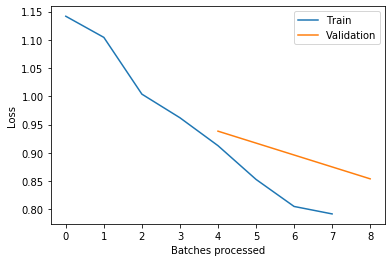

In [10]:
learn.recorder.plot_losses()
learn.show_results()